## Malicious or Benign Websites EDA 

## Chris Heimbuch


## <b><u>Overview</b></u>

placement text placement text placement text placement text placement text placement text placement text placement text placement text placement text placement text placement text placement text placement text placement text |

## <B><U> Section 1: Data Cleaning </B></U>

In [1]:
# Standard DS imports
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patheffects as path_effects

# Inferential Analysis Tests
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

#For null value imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Call in dataset and inspect the head.
df = pd.read_csv("dataset.csv")
df.head()


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [3]:
#Inspect dimensionality of dataset.
print(df.shape)

(1781, 21)


In [4]:
#Inspect the column names and see what we are working with.
df.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [5]:
# Call info to inspect data types and get a preliminary investigtion of any null values. It appears we have some.
df.info()

print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [6]:
#Seeing how many null values I have and in what columns.
df.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [7]:
# Simple Statistical summary of data set with numerical values.
df.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [8]:
#Seeing entire DF.
df

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0


Just a quick preliminary review of my data, it is messy. Columns are uppercase with the last column being title case, there are null values across many rows with some reaching over 800 null values, string data has dashes and certain strings that are the same name such as UTF-8 in the "CHARSET" column are upper case and lower case, the date fields are all in different order with some random characters. Therefore, I will add some consistency across my data to prepare for the exploratory data analysis.

In [9]:
#Going to create a copy of the df to work with.
df_copy = df.copy()

In [10]:
#Make all columns lowercase
df_copy.columns = df_copy.columns.str.lower()

In [11]:
#Clean up the 'charset' column: replace the dashes with spaces and make it Title case
df_copy['charset'] = df_copy['charset'].str.replace('-', ' ')
df_copy['charset'] = df_copy['charset'].str.title()
df_copy['charset'].unique()

array(['Iso 8859 1', 'Utf 8', 'Us Ascii', nan, 'Windows 1251', 'Iso 8859',
       'Windows 1252'], dtype=object)

In [12]:
#Going to perform null value imputation with KNN imputation method.

#Encode only the known values.
le = LabelEncoder()
df_copy['charset_encoded'] = df_copy['charset']
df_copy.loc[df_copy['charset'].notnull(), 'charset_encoded'] = le.fit_transform(df_copy['charset'].dropna())

#Apply KNN imputation on the encoded column.
imputer = KNNImputer(n_neighbors=3)
df_copy['charset_encoded'] = imputer.fit_transform(df_copy[['charset_encoded']])

#Inverse transform the encoded data back to the original categories.
df_copy['charset_imputed'] = df_copy['charset_encoded'].round().astype(int)
df_copy['charset_imputed'] = le.inverse_transform(df_copy['charset_imputed'])

#Compare the original and imputed columns to verify our imputation has succeeded.
imputed_values = df_copy[df_copy['charset'].isnull()]

print(imputed_values[['charset', 'charset_imputed']])

     charset charset_imputed
35       NaN        Us Ascii
81       NaN        Us Ascii
125      NaN        Us Ascii
159      NaN        Us Ascii
952      NaN        Us Ascii
977      NaN        Us Ascii
1069     NaN        Us Ascii


In [13]:
#Dropping as no longer needed.
df_copy = df_copy.drop(columns=["charset_encoded", "charset"])

In [14]:
#Sanity check.
df_copy.isna().sum()

url                            0
url_length                     0
number_special_characters      0
server                       176
content_length               812
whois_country                306
whois_statepro               362
whois_regdate                127
whois_updated_date           139
tcp_conversation_exchange      0
dist_remote_tcp_port           0
remote_ips                     0
app_bytes                      0
source_app_packets             0
remote_app_packets             0
source_app_bytes               0
remote_app_bytes               0
app_packets                    0
dns_query_times                1
type                           0
charset_imputed                0
dtype: int64

In [15]:
#Looking into "server" column now. There is alot of random noise here.
df_copy['server'].unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', nan, 'Apache/2',
       'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
 

In [16]:
#Fill in nulls with unknown.
df_copy['server'].fillna("Unknown", inplace=True)

In [17]:
#Clean up the 'charset' column: replace the dashes with spaces and make it Title case
df_copy['server'] = df_copy['server'].str.lower()

In [18]:
#Grouping values with the least count into one bin "Other" to reduce number of unique values
series = pd.value_counts(df_copy.server)
mask = (series/series.sum() * 100).lt(1)
df_copy['server'] = np.where(df_copy['server'].isin(series[mask].index),'other',df_copy['server'])

In [19]:
#Inspecting changes.
df_copy['server'].unique()

array(['nginx', 'other', 'microsoft-httpapi/2.0', 'unknown', 'apache',
       'nginx/1.12.0', 'cloudflare-nginx', 'microsoft-iis/7.5',
       'apache/2.2.15 (centos)', 'gse', 'ats', 'server',
       'youtubefrontend', 'apache-coyote/1.1'], dtype=object)

In [20]:
 # Further bucketing and cleaning up the server column.

def standardize_server(server_string):
    if 'apache' in server_string:
        return 'apache'
    if 'nginx' in server_string:
        return 'nginx'
    if 'microsoft' in server_string:
        return 'microsoft-IIS'

    return server_string

#Applying function.
df_copy['standardized_server'] = df_copy['server'].apply(standardize_server)
df_copy['standardized_server'] = df_copy['standardized_server'].str.replace('-', ' ')

print(df_copy[['server', 'standardized_server']])

                     server standardized_server
0                     nginx               nginx
1                     other               other
2     microsoft-httpapi/2.0       microsoft IIS
3                     nginx               nginx
4                   unknown             unknown
...                     ...                 ...
1776                 apache              apache
1777                 apache              apache
1778                  other               other
1779       cloudflare-nginx               nginx
1780                  other               other

[1781 rows x 2 columns]


In [21]:
#Final inspection of data.
df_copy['standardized_server'].unique()

array(['nginx', 'other', 'microsoft IIS', 'unknown', 'apache', 'gse',
       'ats', 'server', 'youtubefrontend'], dtype=object)

In [22]:
#Checking values and their amounts.
df_copy['standardized_server'].value_counts()

standardized_server
other              499
apache             431
nginx              341
unknown            176
microsoft IIS      164
gse                 49
server              49
youtubefrontend     42
ats                 30
Name: count, dtype: int64

In [23]:
#Inspecting other columns to clean.
df_copy.isna().sum()

url                            0
url_length                     0
number_special_characters      0
server                         0
content_length               812
whois_country                306
whois_statepro               362
whois_regdate                127
whois_updated_date           139
tcp_conversation_exchange      0
dist_remote_tcp_port           0
remote_ips                     0
app_bytes                      0
source_app_packets             0
remote_app_packets             0
source_app_bytes               0
remote_app_bytes               0
app_packets                    0
dns_query_times                1
type                           0
charset_imputed                0
standardized_server            0
dtype: int64

In [24]:
#Content length has the most null values and has a very large spread. Filling with the mean could work but then it would heavily skew the column since a given website may not exactly have 11726 like the mean.
#The median may also not work well since its 1853, and imputing with KNN may not work well. Instead, I will interpolate the data so it is more linear and equally spaced, to make it more realistic as not every website is equal.
df_copy[['content_length']].describe()

,content_length
count,969.000000
mean,11726.927761
std,36391.809051
min,0.000000
25%,324.000000
50%,1853.000000
75%,11323.000000
max,649263.000000


In [25]:
df_copy['content_length'] = df_copy['content_length'].interpolate()

In [26]:
df_copy[['content_length']].describe()

,content_length
count,1781.000000
mean,13497.243964
std,38415.552697
min,0.000000
25%,603.000000
50%,4714.750000
75%,12578.500000
max,649263.000000


In [27]:
#Inspecting other columns to clean and seeing if we filled in content_length successfully.
df_copy.isna().sum()

url                            0
url_length                     0
number_special_characters      0
server                         0
content_length                 0
whois_country                306
whois_statepro               362
whois_regdate                127
whois_updated_date           139
tcp_conversation_exchange      0
dist_remote_tcp_port           0
remote_ips                     0
app_bytes                      0
source_app_packets             0
remote_app_packets             0
source_app_bytes               0
remote_app_bytes               0
app_packets                    0
dns_query_times                1
type                           0
charset_imputed                0
standardized_server            0
dtype: int64

In [28]:
#Inspecting the whois_country. There is some cleaning that should be done - multiple for the UK, se lowercase, nulls.
df_copy['whois_country'].unique()

array([nan, 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [29]:
df_copy['whois_country'].value_counts()

whois_country
US                1103
CA                  84
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
UK                  10
CN                  10
IN                  10
FR                   9
CZ                   9
NL                   6
CH                   6
[u'GB'; u'UK']       5
KR                   5
PH                   4
BS                   4
ru                   4
AT                   4
HK                   3
us                   3
TR                   3
BE                   3
DE                   3
SC                   3
KY                   3
SE                   3
BR                   2
UY                   2
Cyprus               2
SI                   2
UA                   2
RU                   2
IL                   2
NO                   2
KG                   2
TH                   1
se                   1
LV                   1
LU                   1
United Kingdom       1
UG                  

In [30]:
#Function to replace the strange values in the column.
def replace(x):
    if x == "[u'GB'; u'UK']"or x=="United Kingdom" or x=="UK":
        return "GB"
    elif x == "Cyprus":
        return "CY"
    elif x == "us":
        return "US"
    elif x == "ru":
        return "RU"
    elif x == "se":
        return "SE"
    else:
        return x
    
df_copy["whois_country"] = list(map(lambda x: replace(x), df_copy["whois_country"]))

In [31]:
#Sanity check
df_copy['whois_country'].unique()

array([nan, 'US', 'SC', 'GB', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'LU',
       'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT', 'CZ',
       'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [32]:
#Filling the NA as 'other' category.
df_copy['whois_country'].fillna("Other", inplace=True)

In [33]:
#Sanity check
df_copy['whois_country'].unique()

array(['Other', 'US', 'SC', 'GB', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT',
       'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK',
       'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [34]:
#Inspecting other columns to clean and seeing if we filled in whois_country successfully.
df_copy.isna().sum()

url                            0
url_length                     0
number_special_characters      0
server                         0
content_length                 0
whois_country                  0
whois_statepro               362
whois_regdate                127
whois_updated_date           139
tcp_conversation_exchange      0
dist_remote_tcp_port           0
remote_ips                     0
app_bytes                      0
source_app_packets             0
remote_app_packets             0
source_app_bytes               0
remote_app_bytes               0
app_packets                    0
dns_query_times                1
type                           0
charset_imputed                0
standardized_server            0
dtype: int64

In [35]:
#statepro
df_copy['whois_statepro'].unique()

array([nan, 'AK', 'TX', 'Mahe', 'CO', 'FL', 'Kansas',
       'Novosibirskaya obl.', 'CA', 'Tennessee', 'Vi', 'OR', 'Texas',
       'ALBERTA', 'PANAMA', 'Arizona', 'WI', 'Oregon', 'Andhra Pradesh',
       'AB', 'Tamil Nadu', 'VA', 'NY', 'quebec', 'MA', 'ON', 'New Mexico',
       'British Columbia', 'Massachusetts', 'California', 'bangkok',
       'WEST MIDLANDS', 'TEXAS', 'WC1N', 'Kentucky', 'MD', 'NEW YORK',
       'Washington', 'Colorado', 'PA', 'LA', 'WA', 'Queensland', 'MOSCOW',
       'UK', 'P', 'NH', 'Pennsylvania', 'UTTAR PRADESH', 'NC', 'kireka',
       'IL', 'Missouri', 'Osaka', 'QC', 'Michigan', 'Maryland', 'Ontario',
       'South Carolina', 'Zhejiang', 'New York', 'QLD', 'NJ', 'GA', 'MO',
       'HR', 'ab', 'Greater London', 'Illinois', '--', 'Fukuoka', 'BC',
       'AL', 'Krasnoyarsk', 'MAINE', 'Virginia', 'MH', 'GRAND CAYMAN',
       'Austria', 'DE', 'shandong', 'AZ', 'PRAHA', 'beijingshi',
       'liaoningsheng', 'North Carolina', 'OH', 'Manila', 'Utah', 'MI',
       'NSW

In [36]:
#Cleaning up data and nulls.
def replace_state(x):
    if x == "California"or x=="CALIFORNIA":
        return "CA"
    elif x == "Arizona":
        return "AZ"
    elif x == "New York" or x=="NEW YORK":
        return "NY"
    elif x == "Ohio":
        return "OH"
    elif x == "Utah":
        return "UT"
    elif x == "None":
        return "NA"
    elif x == "Texas":
        return "TX"
    elif x == "Washington":
        return "WA"
    elif x == "va":
        return "VA"
    elif x == "Illinois" or x=="il":
        return "IL"
    elif x == "District of Columbia" or x=="DC" or x=="Maryland":
        return "MD"
    elif x == "New Jersey":
        return "NJ"
    elif x == "Maine" or x=="MAINE":
        return "ME"
    elif x == "Quebec" or x=="QUEBEC" or x=="qc" or x=="quebec":
        return "QC"
    elif x == "Missouri":
        return "MO"
    elif x == "Nevada":
        return "NV"
    elif x == "WC1N" or x=="Greater London" or x=="UK" or x=="WEST MIDLANDS" or x=="worcs" or x=="Peterborough" or x=="London" or x=="HANTS" or x=="MIDDLESEX":
        return "England"
    elif x == "Pennsylvania":
        return "PA"
    elif x == "Florida" or x=="FLORIDA":
        return "FL"
    elif x == "PANAMA":
        return "Panama"
    else:
        return x
    
df_copy["whois_statepro"] = list(map(lambda x: replace_state(x), df_copy["whois_statepro"]))

In [38]:
#Inspecting top 21 values.
df_copy["whois_statepro"].value_counts()[:21]

whois_statepro
CA           430
NY            87
WA            75
FL            67
AZ            64
Barcelona     62
ON            45
UT            42
NV            33
IL            28
PA            28
CO            24
England       22
MO            22
MA            22
Panama        21
OH            21
TX            19
VA            18
NJ            16
QC            15
Name: count, dtype: int64

In [39]:
#Grouping values with the least count into one bin "Other" to reduce number of unique values
counts = df_copy['whois_statepro'].value_counts()
df_copy['whois_statepro'] = np.where(df_copy['whois_statepro'].isin(counts[counts < 15].index),'Other',df_copy['whois_statepro'])

In [41]:
#Fill null's with "Other".
df_copy['whois_statepro'].fillna("Other", inplace=True)

In [44]:
df_copy['whois_statepro'].unique()

array(['Other', 'TX', 'CO', 'FL', 'CA', 'Panama', 'AZ', 'VA', 'NY', 'QC',
       'MA', 'ON', 'England', 'WA', 'PA', 'IL', 'MO', 'NJ', 'OH', 'UT',
       'NV', 'Barcelona'], dtype=object)

In [45]:
#Inspecting other columns to clean and seeing if we filled in whois_country successfully.
df_copy.isna().sum()

url                            0
url_length                     0
number_special_characters      0
server                         0
content_length                 0
whois_country                  0
whois_statepro                 0
whois_regdate                127
whois_updated_date           139
tcp_conversation_exchange      0
dist_remote_tcp_port           0
remote_ips                     0
app_bytes                      0
source_app_packets             0
remote_app_packets             0
source_app_bytes               0
remote_app_bytes               0
app_packets                    0
dns_query_times                1
type                           0
charset_imputed                0
standardized_server            0
dtype: int64

In [46]:
#Inspect the regdate column
df_copy['whois_regdate'].value_counts()

whois_regdate
17/09/2008 0:00    62
13/01/2001 0:12    59
31/07/2000 0:00    47
15/02/2005 0:00    41
29/03/1997 0:00    33
                   ..
23/11/1994 0:00     1
30/08/2015 0:00     1
30/04/2009 0:00     1
27/11/2006 0:00     1
14/11/2008 0:00     1
Name: count, Length: 890, dtype: int64

In [47]:
#Inspection
df_copy['whois_regdate'].unique()

array(['10/10/2015 18:21', nan, '7/10/1997 4:00', '12/05/1996 0:00',
       '3/08/2016 14:30', '29/07/2002 0:00', '18/03/1997 0:00',
       '8/11/2014 7:41', '14/09/2007 0:00', '22/11/2016 0:00',
       '11/10/2002 0:00', '14/11/2002 0:00', '16/07/2000 0:00',
       '25/05/2013 0:00', '9/08/1999 0:00', '15/09/2013 0:00',
       '3/07/1999 0:00', '2/11/2003 0:00', '12/08/2008 22:10',
       '21/05/2009 0:00', '1/08/2002 0:00', '13/01/2005 0:00',
       '18/05/2005 19:41', '4/01/2001 0:00', '28/02/2008 10:58',
       '8/12/2006 0:00', '16/06/2000 0:00', '13/10/2000 0:00',
       '31/12/1999 0:00', '30/07/1996 0:00', '9/05/2008 0:00',
       '23/04/1999 0:00', '4/02/1997 0:00', '13/02/2003 0:00',
       '17/05/2008 0:00', '30/05/2002 0:00', '20/10/2005 0:00',
       '7/01/2006 0:00', '5/03/1996 5:00', '23/03/1995 0:00',
       '10/01/1998 0:00', '27/04/2016 0:00', '7/04/2011 0:00',
       '26/02/2009 0:00', '3/07/2002 0:00', '21/02/1995 0:00',
       '4/07/2007 0:00', '2/07/1998 0:00', '1

In [48]:
#Going to look at the dates now and clean up the format on those.

#Make function to clean up data column.
def date_cleaner(datetime_str):
    if datetime_str in [np.nan, "b", "0", "None"]:  # these are the missing values and a random b thrown in the mix.
        return np.nan
    
    if "T" in datetime_str:
        split_datetime = datetime_str.split("T")
    else:
        split_datetime = datetime_str.split()
    
    date = split_datetime[0]
    date_with_slash = date.replace("-", "/")
    
    if date_with_slash == "2002/03/20":  # only one instance of this.
        date_with_slash = "20/03/2002"
    return date_with_slash

In [49]:
#Going to apply the cleaner format to both regdate and updated date columns
df_copy.whois_regdate = df_copy.whois_regdate.apply(date_cleaner)
df_copy["whois_regdate"] = pd.to_datetime(df_copy.whois_regdate, format="%d/%m/%Y", errors="coerce")

#Update the updated_date column
df_copy.whois_updated_date = df_copy.whois_updated_date.apply(date_cleaner)
df_copy["whois_updated_date"] = pd.to_datetime(df_copy.whois_updated_date, format="%d/%m/%Y", errors="coerce")

#Filling null values with the median. The reason being is it is impossible to know what these dates could be. The median offers the most common date which could help with our analysis.
df_copy["whois_regdate"].fillna(df_copy["whois_regdate"].median(), inplace=True)
df_copy["whois_updated_date"].fillna(df_copy["whois_updated_date"].median(), inplace=True)

In [50]:
#Deal with 1 last null value in dns_query_times. 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   url                        1781 non-null   object        
 1   url_length                 1781 non-null   int64         
 2   number_special_characters  1781 non-null   int64         
 3   server                     1781 non-null   object        
 4   content_length             1781 non-null   float64       
 5   whois_country              1781 non-null   object        
 6   whois_statepro             1781 non-null   object        
 7   whois_regdate              1781 non-null   datetime64[ns]
 8   whois_updated_date         1781 non-null   datetime64[ns]
 9   tcp_conversation_exchange  1781 non-null   int64         
 10  dist_remote_tcp_port       1781 non-null   int64         
 11  remote_ips                 1781 non-null   int64         
 12  app_by

In [51]:
#I will interpolate the dns query column. It's one value, so filling in the null value with a linear approach should work.
df_copy['dns_query_times'] = df_copy['dns_query_times'].interpolate()

In [57]:
#Sanity check - clear.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   url                        1781 non-null   object        
 1   url_length                 1781 non-null   int64         
 2   number_special_characters  1781 non-null   int64         
 3   content_length             1781 non-null   float64       
 4   whois_country              1781 non-null   object        
 5   whois_statepro             1781 non-null   object        
 6   whois_regdate              1781 non-null   datetime64[ns]
 7   whois_updated_date         1781 non-null   datetime64[ns]
 8   tcp_conversation_exchange  1781 non-null   int64         
 9   dist_remote_tcp_port       1781 non-null   int64         
 10  remote_ips                 1781 non-null   int64         
 11  app_bytes                  1781 non-null   int64         
 12  source

In [58]:
#Change column to int type for cleaner clarity.
df_copy['dns_query_times'] = df_copy['dns_query_times'].astype(int) 

In [59]:
#Sanity check
df_copy['dns_query_times'].value_counts()

dns_query_times
0     976
4     309
6     213
2     143
8     105
10     19
12     12
14      2
20      1
9       1
Name: count, dtype: int64

In [61]:
#Drop the server column since we have it standardized and ready to go.
df_copy = df_copy.drop(columns=["server"])

In [62]:
#Data is now clean and ready to go!
df_copy.head()

,url,url_length,number_special_characters,content_length,whois_country,whois_statepro,whois_regdate,whois_updated_date,tcp_conversation_exchange,dist_remote_tcp_port,...,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type,charset_imputed,standardized_server
0,M0_109,16,7,263.0,Other,Other,2015-10-10,2016-08-23,7,0,...,700,9,10,1153,832,9,2,1,Iso 8859 1,nginx
1,B0_2314,16,6,15087.0,Other,Other,2001-01-16,2016-08-23,17,7,...,1230,17,19,1265,1230,17,0,0,Utf 8,other
2,B0_911,16,6,324.0,Other,Other,2001-01-16,2016-08-23,0,0,...,0,0,0,0,0,0,0,0,Us Ascii,microsoft IIS
3,B0_113,17,6,162.0,US,Other,1997-10-07,2013-09-12,31,22,...,3812,39,37,18784,4380,39,8,0,Iso 8859 1,nginx
4,B0_403,17,6,124140.0,US,TX,1996-05-12,2017-04-11,57,2,...,4278,61,62,129889,4586,61,4,0,Utf 8,unknown


## <B><U> Section 2: Descriptive Questions </B></U>

### 1. How many unique URL's are in the dataset?

### Answer: There are 1781 unique websites examined in the dataset.

In [63]:
df_copy['url'].nunique()

1781

### 2. How many websites are malicious and how many are benign?

In [64]:
def plot_hist(data, plot_title, x_name, y_name, bin_amount=10, bar_color='#CC313D', face_color='#F7C5CC', annotate_color='black', annotate_font=10, annotate_placement=1):

    #Custom Fonts
    font1 = {'family':'verdana','color':'#000000','size':20}
    font2 = {'family':'verdana','color':'#000000','size':16}

    #Create the plot, set x & y axis titles, and graph title.
    fig, ax = plt.subplots(figsize=(12,8))
    n, bins, patches = ax.hist(x=data, bins=bin_amount, color=bar_color, edgecolor='black', zorder=3)
    ax.set_title(plot_title, fontdict=font1)
    ax.set_xlabel(x_name, fontdict=font2)
    ax.set_ylabel(y_name,fontdict=font2)

    #Plot Styling for axes ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax.set_facecolor(face_color)

    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)


    for i in range(len(patches)):
        ax.text((bins[i] + bins[i+1]) / 2,  # Midpoint of the bin
                n[i] + annotate_placement,  # Height of the bin
                f'{n[i]:.0f}',  # Annotation text
                ha='center', 
                va='top', 
                color=annotate_color, 
                fontsize=annotate_font)

    ax.grid(axis='y')
    plt.xticks(ha='center')

    plt.show()


def plot_bar(x_data, y_data, plot_title, x_name, y_name, bar_color='#CC313D', face_color='#F7C5CC', annotate_color='black', annotate_font=10, annotate_placement=1):

    #Custom Fonts
    font1 = {'family':'verdana','color':'#000000','size':20}
    font2 = {'family':'verdana','color':'#000000','size':16}

    #Create the plot, set x & y axis titles, and graph title.
    fig, ax = plt.subplots(figsize=(12,8))
    ax.bar(x=x_data, height=y_data, color=bar_color, edgecolor='black', zorder=3)
    ax.set_title(plot_title, fontdict=font1)
    ax.set_xlabel(x_name, fontdict=font2)
    ax.set_ylabel(y_name,fontdict=font2)

    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)

    #Plot Styling for axes ticks
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_facecolor(face_color)



    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, 
            height + annotate_placement, 
            f'{height:.0f}', 
            ha='center', 
            va='top', 
            color=annotate_color, 
            fontsize=annotate_font)

    ax.grid(axis='y')
    plt.xticks(ha='center')

    plt.show()

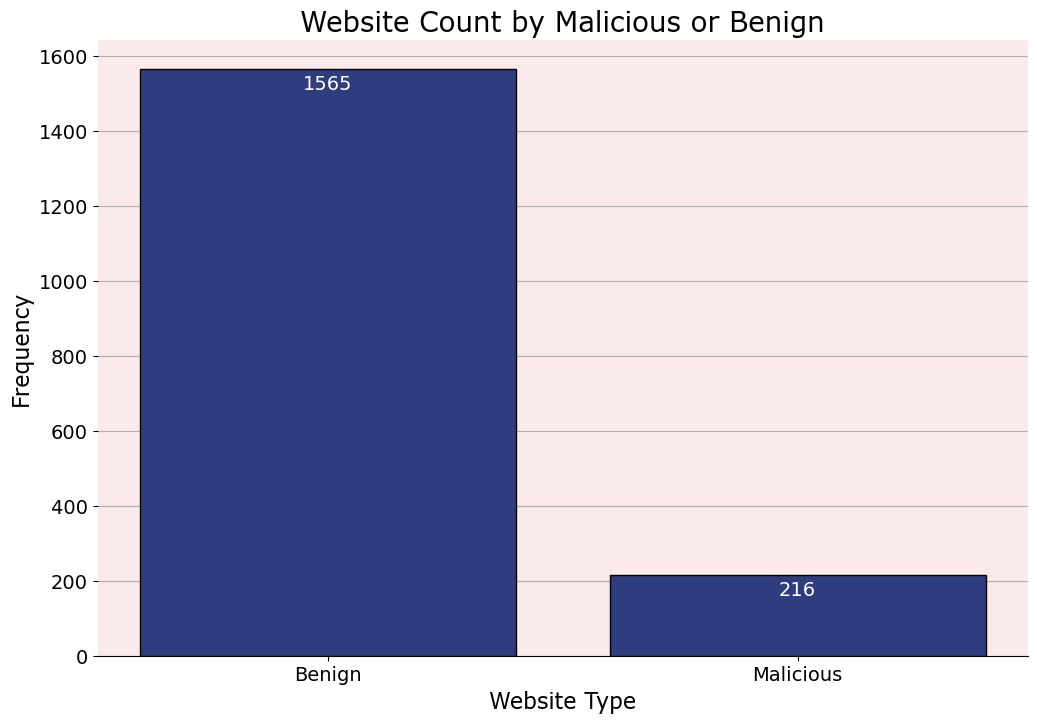

In [65]:
counts = df_copy['type'].value_counts()
counts = counts.rename(index={0: 'Benign', 1: 'Malicious'})

plot_bar(counts.index, counts.values, "Website Count by Malicious or Benign", "Website Type", "Frequency", '#2F3C7E', '#FBEAEB', 'white', 14, -14)

### 3. Do malicious websites have many special characters in their URL?

In [70]:
#Create Data frame masks.
MALICIOUS_WEBSITES = df_copy['type'] == 1
BENIGN_WEBSITES = df_copy['type'] == 0

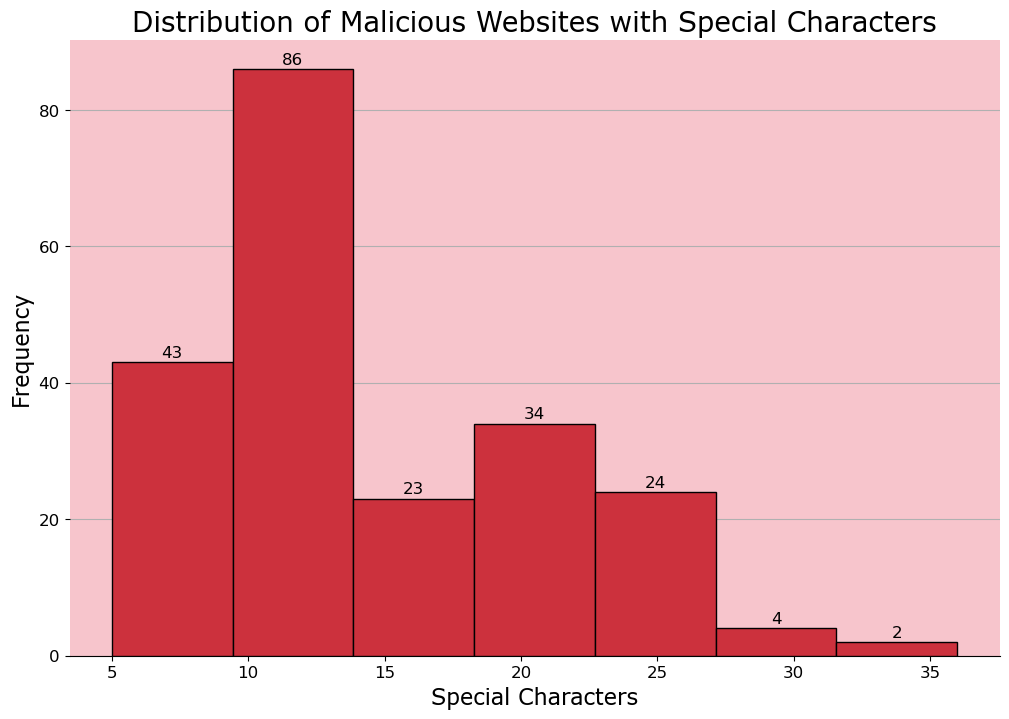

In [72]:
#Data sorting to set up for plotting.
special_characters_malicious = df_copy[MALICIOUS_WEBSITES]['number_special_characters'].values

#Plot data.
plot_hist(special_characters_malicious, 
        "Distribution of Malicious Websites with Special Characters", 
        "Special Characters", 
        "Frequency", 
        bin_amount=7, 
        annotate_placement=2.5, 
        annotate_color="black", 
        annotate_font=12)

### 4. Do benign websites have many special characters in their url?

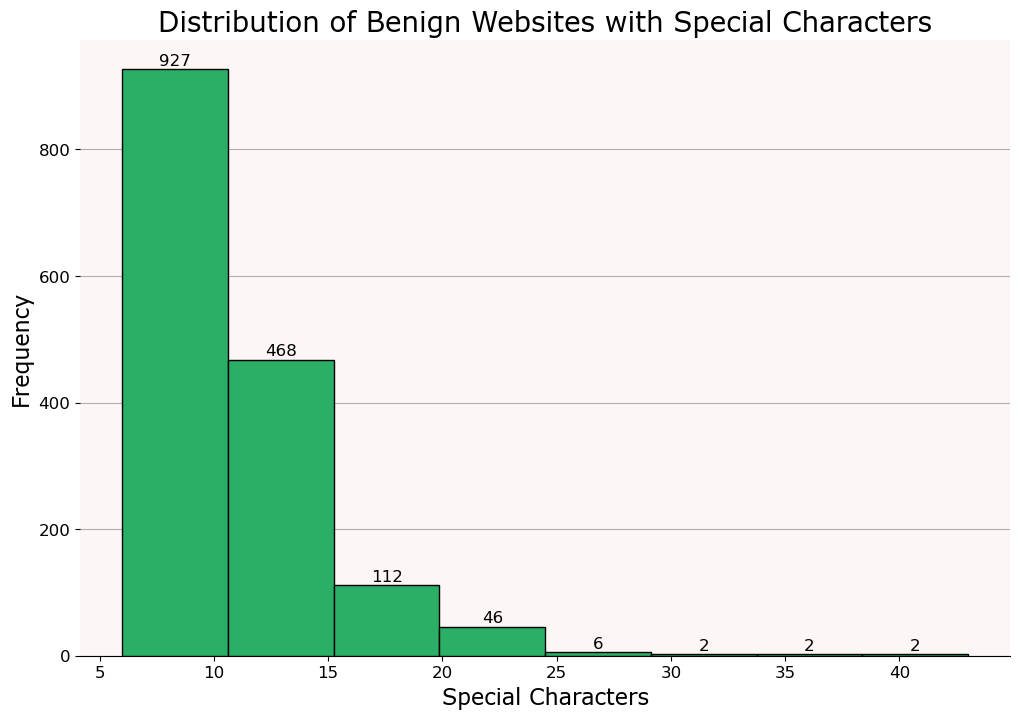

In [73]:
#Data sorting to set up for plotting.
special_characters_benign = df_copy[BENIGN_WEBSITES]['number_special_characters'].values

#Plot data.
plot_hist(special_characters_benign, 
        "Distribution of Benign Websites with Special Characters",
        "Special Characters", "Frequency",
         bin_amount=8, 
         bar_color="#2BAE66FF", 
         face_color="#FCF6F5FF",
         annotate_placement=25, 
         annotate_color="black", 
         annotate_font=12)

### 5.	Do malicious websites generate many IP packets when communicating between a honeypot and the server?

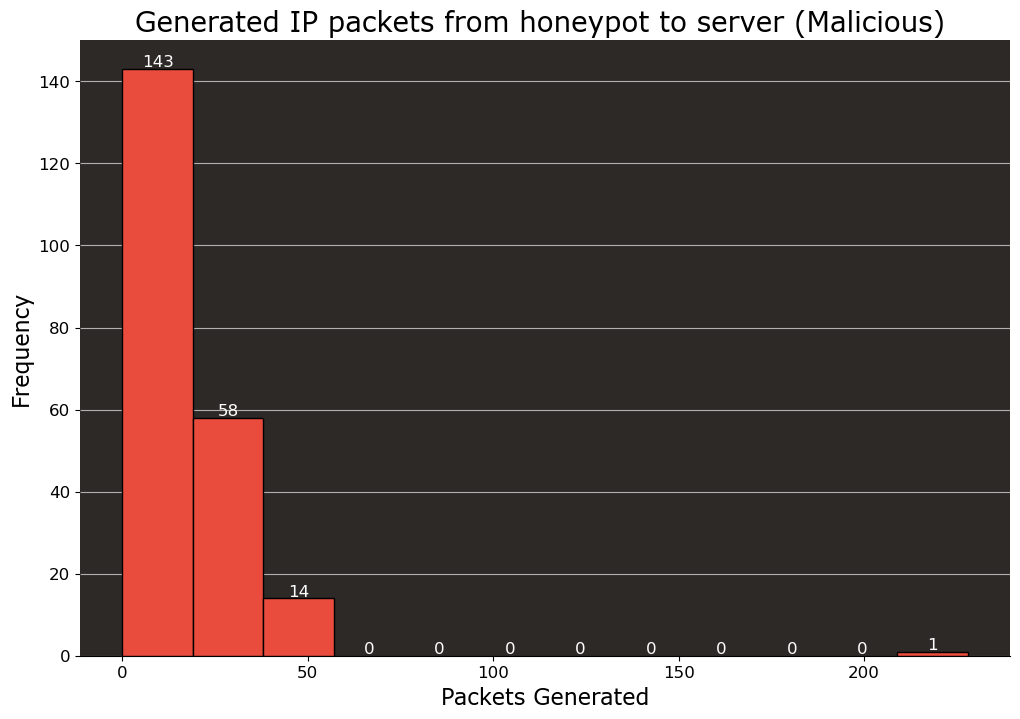

In [74]:
#Data sorting for plotting
malicious_df = df_copy[MALICIOUS_WEBSITES]
malicious_app_packets = df_copy[MALICIOUS_WEBSITES]['app_packets'].values

#Plotting
plot_hist(malicious_app_packets, 
        "Generated IP packets from honeypot to server (Malicious) ", 
        "Packets Generated", "Frequency", 
        bin_amount=12, 
        bar_color="#E94B3CFF", 
        face_color="#2D2926FF",
        annotate_placement=3.5, 
        annotate_color="white", 
        annotate_font=12)

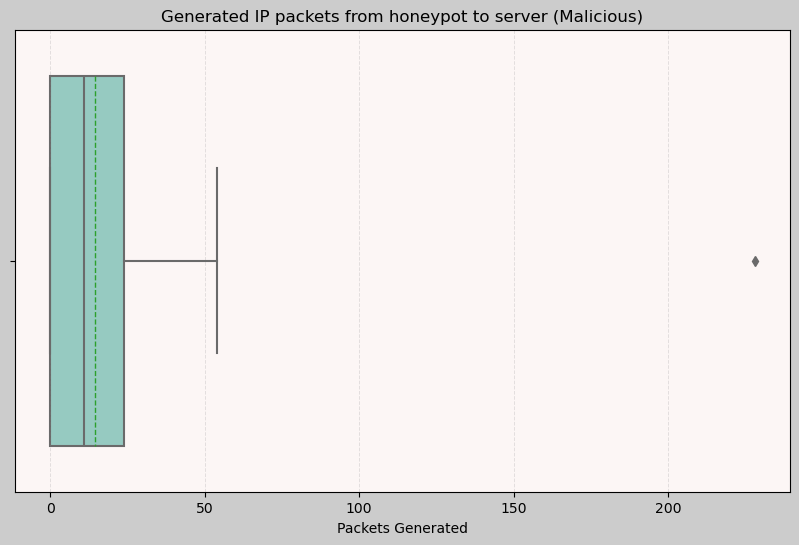

In [75]:
#Boxplot of the distribution

plt.figure(figsize=(10, 6), facecolor="#cccccc")
sns.boxplot(x=malicious_app_packets,
            palette="Set3",
            zorder=2,
            showmeans=True,
            meanline=True)
plt.title('Generated IP packets from honeypot to server (Malicious)')
plt.xlabel('Packets Generated')

#Set background of grid to custom color and add y-axis gridlines.
ax = plt.gca()
ax.set_facecolor('#FCF6F5')
plt.grid(True, axis='x', linestyle='--', linewidth=0.7, color='gray', alpha=0.2, zorder=1)

plt.show()


### 6.	Do benign websites generate many IP packets when communicating between a honeypot and the server?

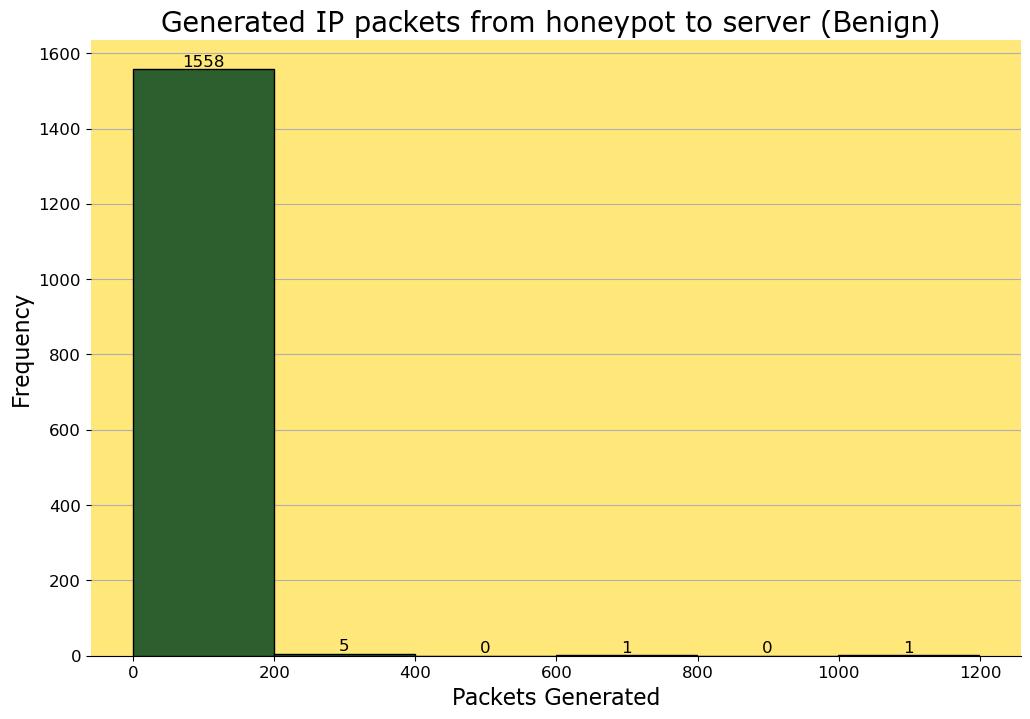

In [76]:
#Data sorting for plotting
benign_app_packets = df_copy[BENIGN_WEBSITES]['app_packets'].values

#Plot data.
plot_hist(benign_app_packets, 
        "Generated IP packets from honeypot to server (Benign) ", 
        "Packets Generated", 
        "Frequency", 
        bin_amount=6, 
        bar_color="#2C5F2DFF", 
        face_color="#FFE77AFF", 
        annotate_placement=40, 
        annotate_color="black", 
        annotate_font=12)

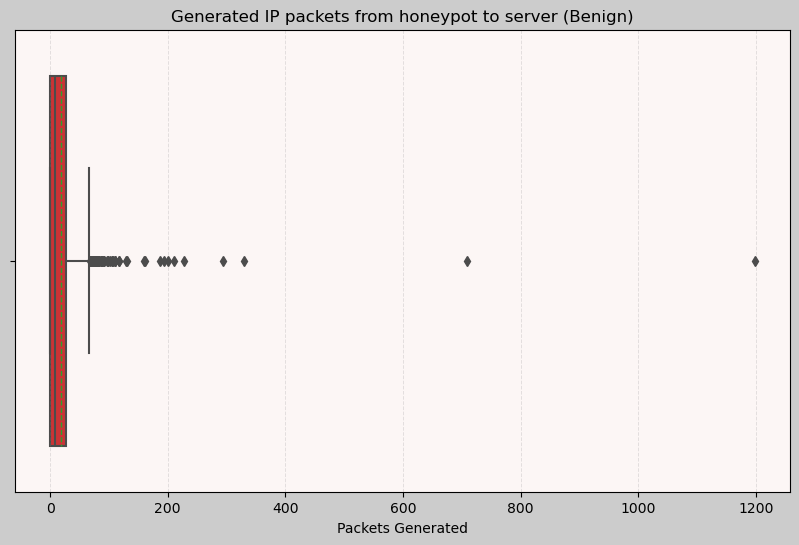

In [81]:
#Boxplot of the distribution
plt.figure(figsize=(10, 6), facecolor="#cccccc")
sns.boxplot(x=benign_app_packets,
            palette="Set1",
            zorder=2,
            showmeans=True,
            meanline=True)
plt.title('Generated IP packets from honeypot to server (Benign)')
plt.xlabel('Packets Generated')

#Set background of grid to custom color and add y-axis gridlines.
ax = plt.gca()
ax.set_facecolor('#FCF6F5')
plt.grid(True, axis='x', linestyle='--', linewidth=0.7, color='gray', alpha=0.2, zorder=1)

plt.show()



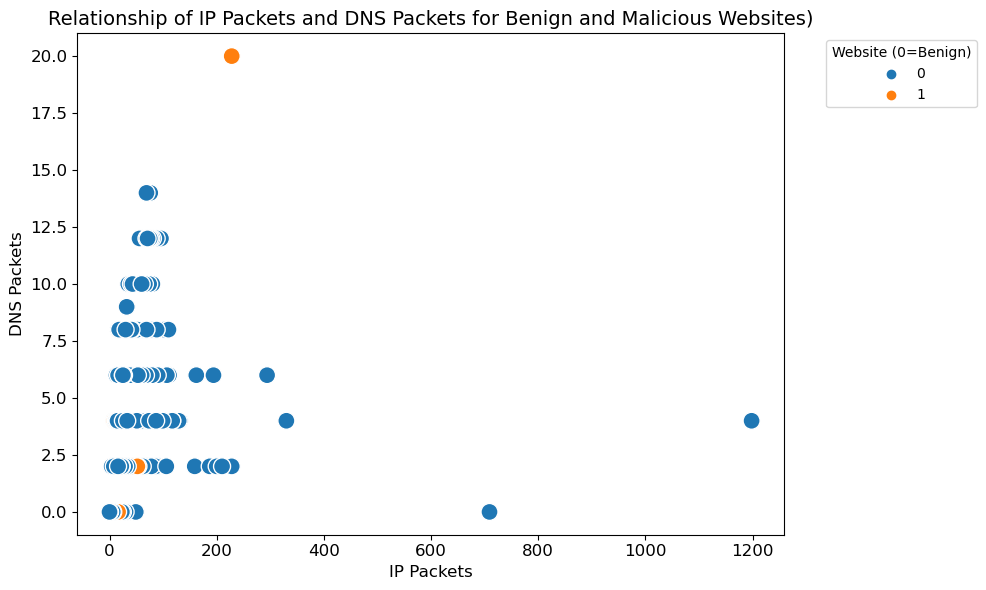

In [82]:
# Relationship analysis for DNS Query Times and APP Packetsd
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x=df_copy['app_packets'], y=df_copy['dns_query_times'], hue=df_copy['type'], s=150)
plt.title("Relationship of IP Packets and DNS Packets for Benign and Malicious Websites)", fontsize=14)
plt.xlabel('IP Packets', fontsize=12)
plt.ylabel('DNS Packets', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Website (0=Benign)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 7.	Which countries host the most malicious websites?

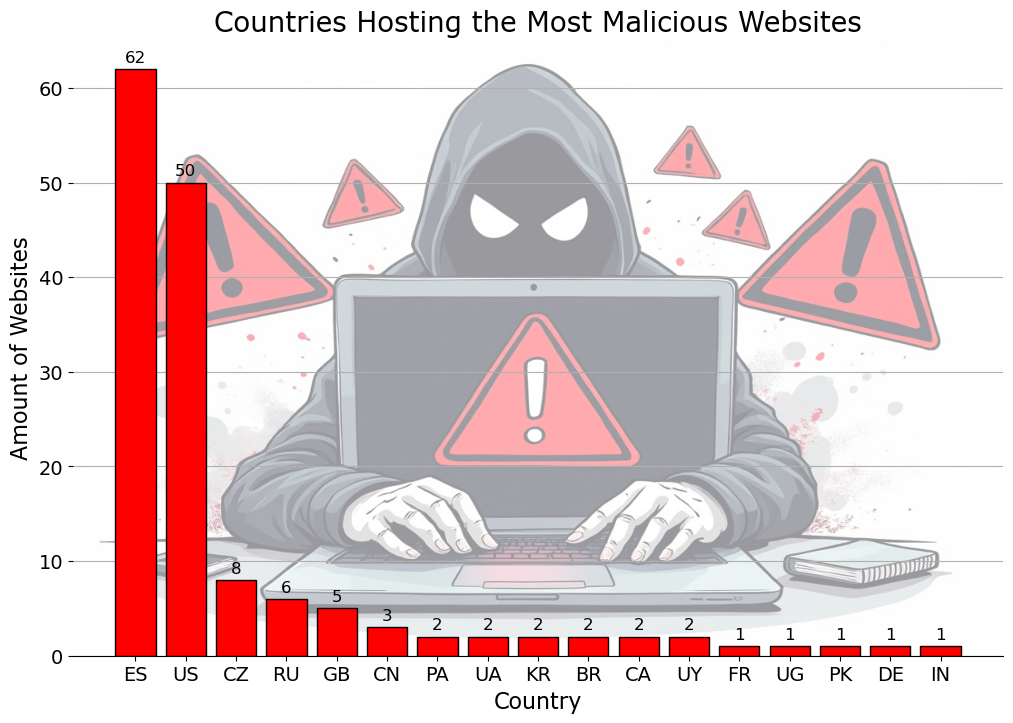

In [83]:
#Sort Data
countries_malicious_df = df_copy[MALICIOUS_WEBSITES]
MASK_COUNTRY = countries_malicious_df['whois_country'] != "Other"
country_malicious = countries_malicious_df[MASK_COUNTRY]['whois_country'].value_counts()

#Custom Fonts
font1 = {'family':'verdana','color':'#000000','size':20}
font2 = {'family':'verdana','color':'#000000','size':16}

#Create the plot, set x & y axis titles, and graph title.
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x=country_malicious.index, height=country_malicious.values, color='red', edgecolor='black', zorder=3)
ax.set_title('Countries Hosting the Most Malicious Websites', fontdict=font1)
ax.set_xlabel('Country', fontdict=font2)
ax.set_ylabel('Amount of Websites',fontdict=font2)

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

#Plot Styling for axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_facecolor("white")


# Get the current axis limits.
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

#Customize the graph, set image background
background = plt.imread(r'C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_3\Phase 3 Project\source\images\malicious.jfif')
ax.imshow(background, extent=[x_min, x_max, y_min, y_max], aspect='auto', alpha=0.4)

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
        height + 2, 
        f'{height:.0f}', 
        ha='center', 
        va='top', 
        color="black", 
        fontsize=12)

ax.grid(axis='y', zorder=3)
plt.xticks(ha='center')

plt.show()

### 8.	Of the malicious websites, what is the most common server type?

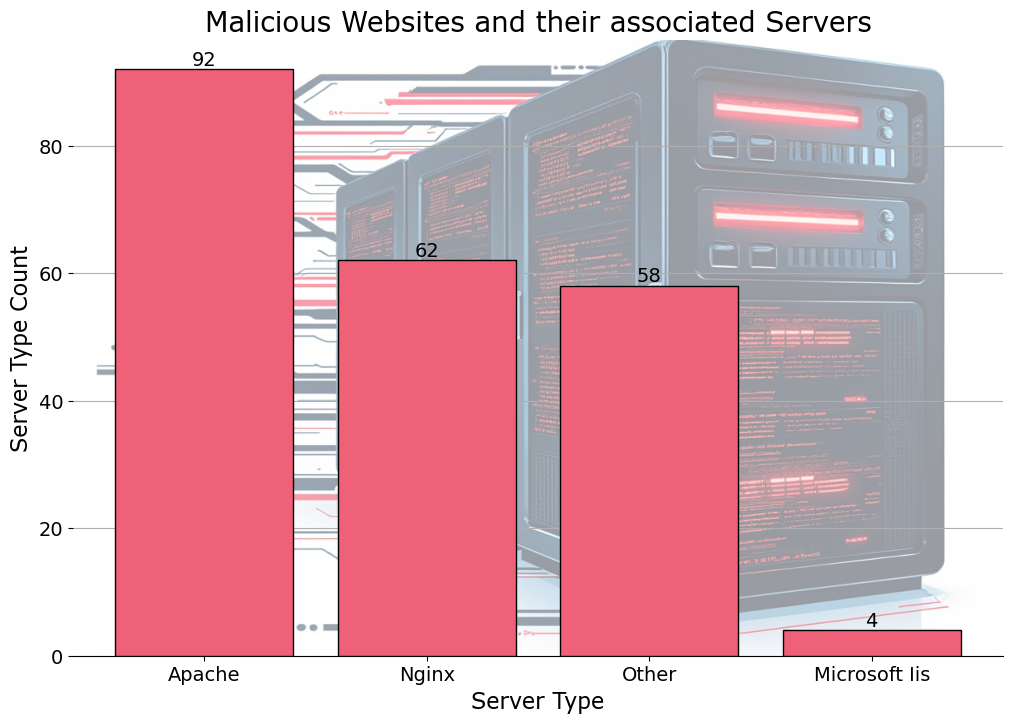

In [84]:
#Sort Data
country_malicious = countries_malicious_df['standardized_server'].value_counts()
country_malicious.index = country_malicious.index.str.title()

#Custom Fonts
font1 = {'family':'verdana','color':'#000000','size':20}
font2 = {'family':'verdana','color':'#000000','size':16}

#Create the plot, set x & y axis titles, and graph title.
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x=country_malicious.index, height=country_malicious.values, color='#EF6079FF', edgecolor='black', zorder=3)
ax.set_title('Malicious Websites and their associated Servers', fontdict=font1)
ax.set_xlabel('Server Type', fontdict=font2)
ax.set_ylabel('Server Type Count',fontdict=font2)

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

#Plot Styling for axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_facecolor("white")


# Get the current axis limits.
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

#Customize the graph, set image background
background = plt.imread(r'C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_3\Phase 3 Project\source\images\server.jfif')
ax.imshow(background, extent=[x_min, x_max, y_min, y_max], aspect='auto', alpha=0.4)

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
        height + 3, 
        f'{height:.0f}', 
        ha='center', 
        va='top', 
        color="black", 
        fontsize=14)

ax.grid(axis='y', zorder=3)
plt.xticks(ha='center')

plt.show()

### 9.	Of the malicious websites, what is the most common server character encoding?

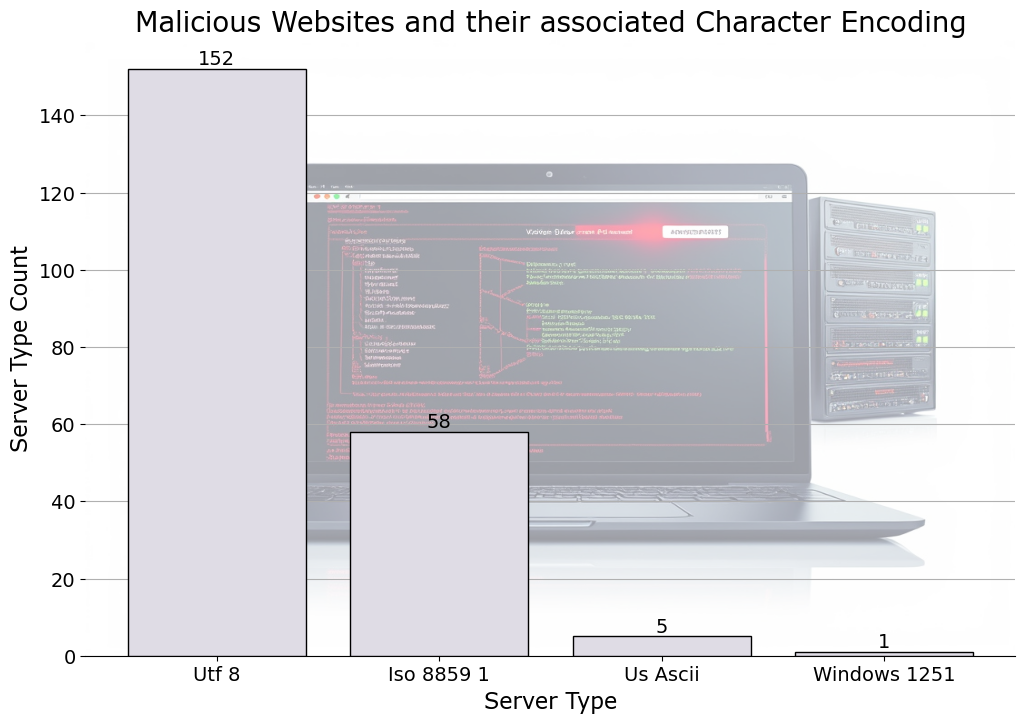

In [85]:
#Sort Data
country_malicious = countries_malicious_df['charset_imputed'].value_counts()
country_malicious.index = country_malicious.index.str.title()

#Custom Fonts
font1 = {'family':'verdana','color':'#000000','size':20}
font2 = {'family':'verdana','color':'#000000','size':16}

#Create the plot, set x & y axis titles, and graph title.
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x=country_malicious.index, height=country_malicious.values, color='#DFDCE5FF', edgecolor='black', zorder=3)
ax.set_title('Malicious Websites and their associated Character Encoding', fontdict=font1)
ax.set_xlabel('Server Type', fontdict=font2)
ax.set_ylabel('Server Type Count',fontdict=font2)

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

#Plot Styling for axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_facecolor("white")


# Get the current axis limits.
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

#Customize the graph, set image background
background = plt.imread(r'C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_3\Phase 3 Project\source\images\charset.jfif')
ax.imshow(background, extent=[x_min, x_max, y_min, y_max], aspect='auto', alpha=0.4)

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
        height + 5, 
        f'{height:.0f}', 
        ha='center', 
        va='top', 
        color="black", 
        fontsize=14)

ax.grid(axis='y', zorder=3)
plt.xticks(ha='center')

plt.show()

### Section 3: Inferential Analysis (All Tests 95% Significance Level)

In [87]:
#Function for testing our hypothesis.
def test_outcome(pvalue, alpha=0.05):
    if pvalue < alpha:
        return "Reject the null hypothesis."
    else:
        return "Fail to reject the null hypothesis."

#KDE Function for beautified graphs.
def plot_kde(column, title, x_name, label, x_val, y_val, color='#408EC6', legend_loc='upper left'):
    #Font dictionaries for custom styling
    
    font1 = {'family':'serif','color':'black','size':16}
    font2 = {'family':'serif','color':'black','size':14}
    
    #Set up the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    #KDE plot
    sns.kdeplot(data=df_copy, x=column, color=color, label=label, fill=True)

    #Labeling axes, customizing font sizes and styles, adjust tick sizes, and setting face color to the ax.
    plt.title(title, fontdict=font1)
    plt.xlabel(x_name, fontdict=font2)
    plt.ylabel('Probability Density', fontdict=font2)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.4)
    ax.set_facecolor('#f0f0f0')

    # Add a vertical line at the mean
    mean_points = df_copy[column].mean()
    plt.axvline(mean_points, color='red', linestyle='--', linewidth=1)
    plt.text(mean_points - x_val, y_val, f'Mean: {mean_points:.2f}', color='red', fontsize=12, path_effects=[path_effects.Stroke(linewidth=.5, foreground='black'),
                              path_effects.Normal()])

    # Add legend
    plt.legend(loc=legend_loc, fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

    plt.show()

#Function for hypothesis testing.
def multi_sample_test(dataset1, dataset2, x1, x2, label1, label2, title, xname, yname, 
                      dataset3=None, x3=None, label3=None, 
                      dataset4=None, x4=None, label4=None,
                      kde_color1='#fbb30b', kde_color2='#9ce15b', kde_color3='#5d8aa8', kde_color4='#e74c3c'):

    font3 = {'family':'fantasy','color':'black','size':20}
    font4 = {'family':'fantasy','color':'black','size':14}   
    
    # Set up the plot
    plt.figure(figsize=(12 if dataset4 is None else 14, 7))  

    # KDE plots
    sns.kdeplot(data=dataset1, x=x1, color=kde_color1, label=label1, fill=True, alpha=0.7)
    sns.kdeplot(data=dataset2, x=x2, color=kde_color2, label=label2, fill=True, alpha=0.7)
    
    if dataset3 is not None:
        sns.kdeplot(data=dataset3, x=x3, color=kde_color3, label=label3, fill=True, alpha=0.7)
    
    if dataset4 is not None:
        sns.kdeplot(data=dataset4, x=x4, color=kde_color4, label=label4, fill=True, alpha=0.7)

    # Labeling axes, customizing font sizes and styles, adjust tick sizes, and setting face color to the ax.
    plt.title(title, fontdict=font3)
    plt.xlabel(xname, fontdict=font4)
    plt.ylabel(yname, fontdict=font4)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    ax = plt.gca()
    ax.set_facecolor('#f0f0f0')

    # Add legend
    plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
    plt.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True, shadow=True, 
               facecolor='white', edgecolor='black', ncol=1 if dataset4 is None else 3) 

    plt.show()



### First I will inspect the distribution of my data via a KDE plot for numerous columns.

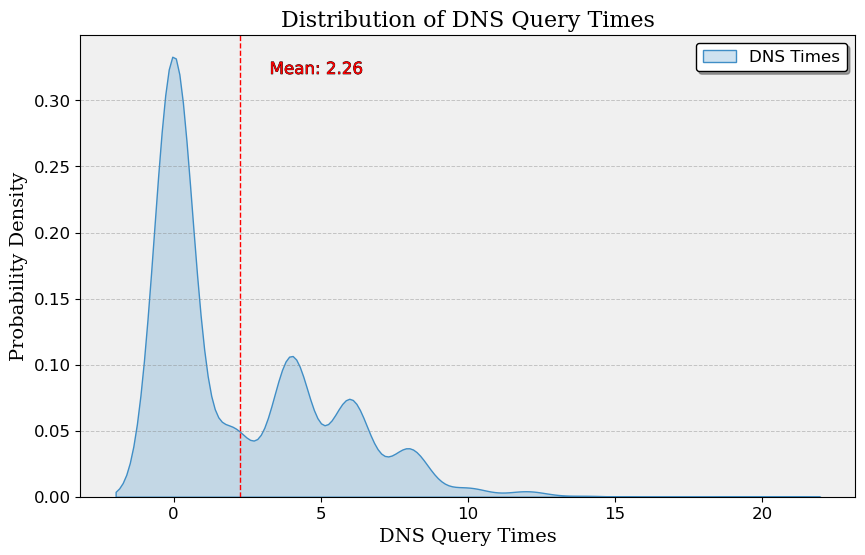

In [92]:
plot_kde(column="dns_query_times", 
        title="Distribution of DNS Query Times", 
        x_name="DNS Query Times", 
        label="DNS Times", 
        x_val=-1, 
        y_val=.32, 
        color='#408EC6', 
        legend_loc="upper right")

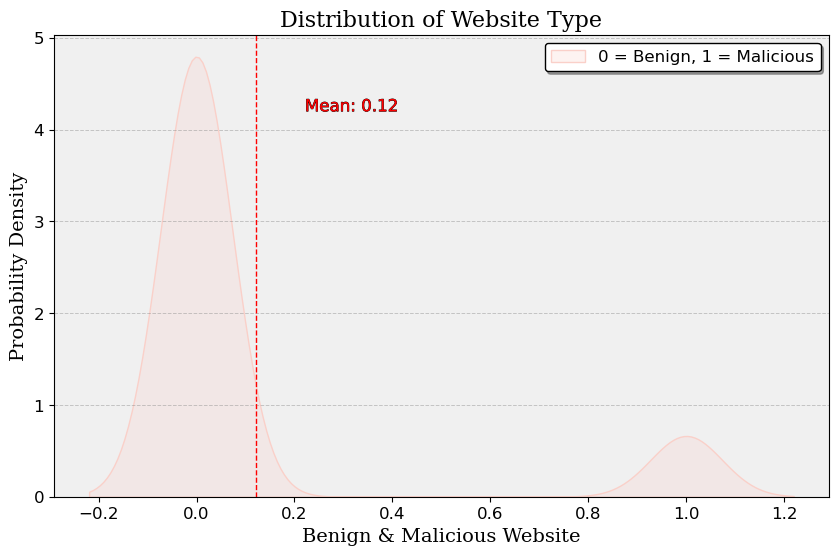

In [93]:
plot_kde(column="type", 
        title="Distribution of Website Type", 
        x_name="Benign & Malicious Website", 
        label="0 = Benign, 1 = Malicious", 
        x_val=-0.1, 
        y_val=4.2, 
        color='#FAD0C9FF', 
        legend_loc="upper right")

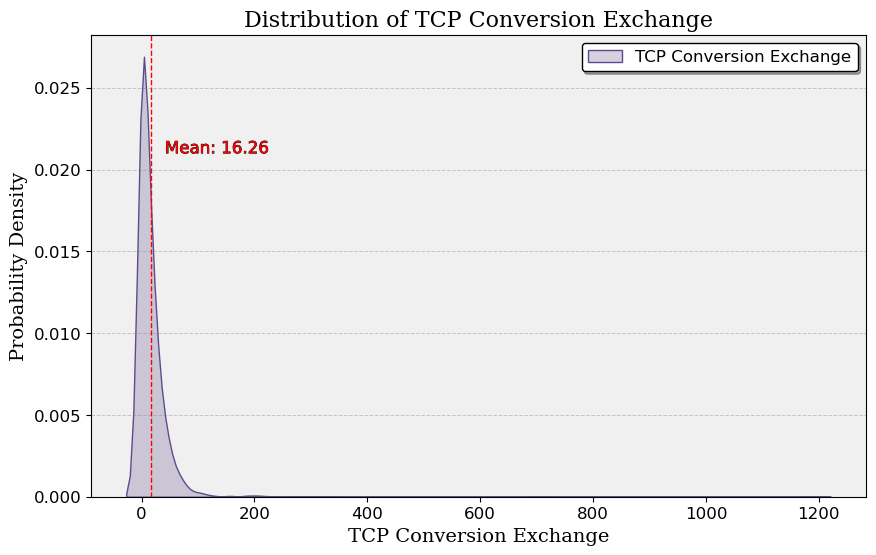

In [94]:
plot_kde(column="tcp_conversation_exchange", 
        title="Distribution of TCP Conversion Exchange", 
        x_name="TCP Conversion Exchange", 
        label="TCP Conversion Exchange", 
        x_val=-25, 
        y_val=.021, 
        color='#5F4B8BFF', 
        legend_loc="upper right")

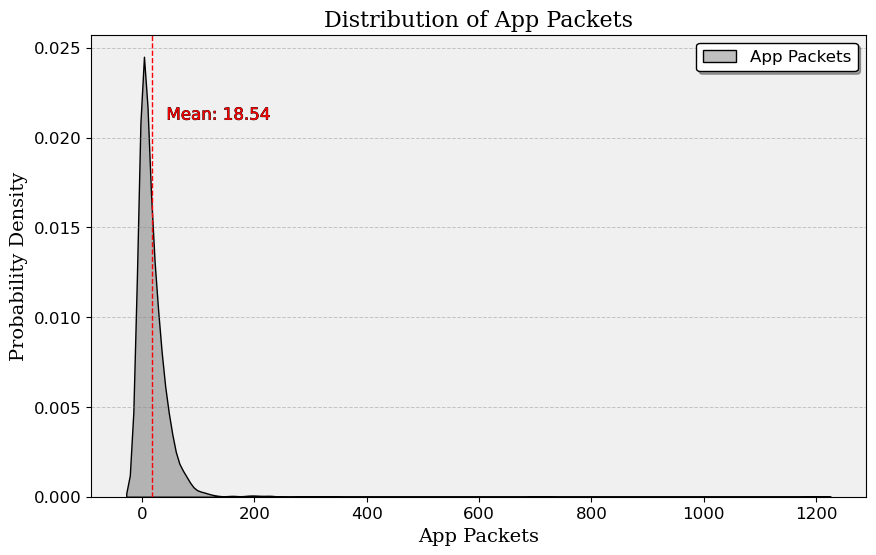

In [95]:
plot_kde(column="app_packets", 
        title="Distribution of App Packets", 
        x_name="App Packets", 
        label="App Packets", 
        x_val=-25, 
        y_val=0.021, 
        color='#000000FF', 
        legend_loc="upper right")

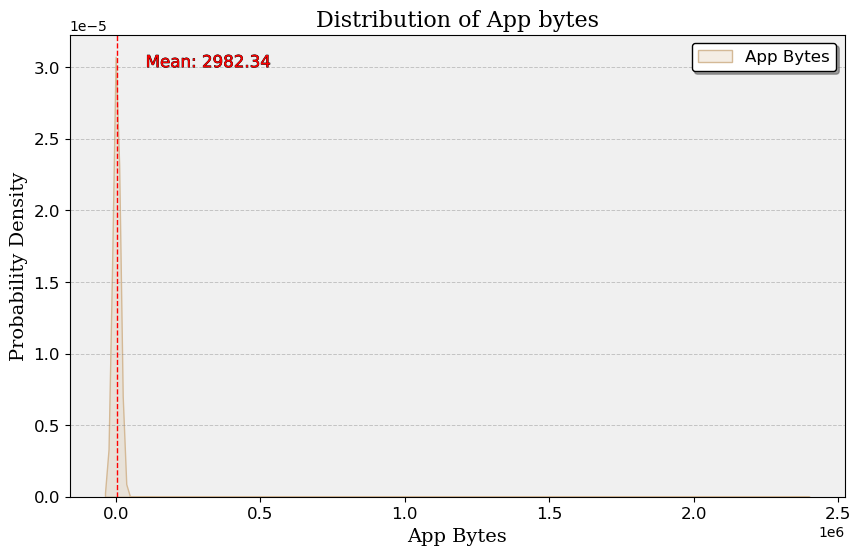

In [96]:
plot_kde(column="app_bytes", 
        title="Distribution of App bytes", 
        x_name="App Bytes", 
        label="App Bytes", 
        x_val=-100000, 
        y_val=0.00003, 
        color='#D4B996FF', 
        legend_loc="upper right")

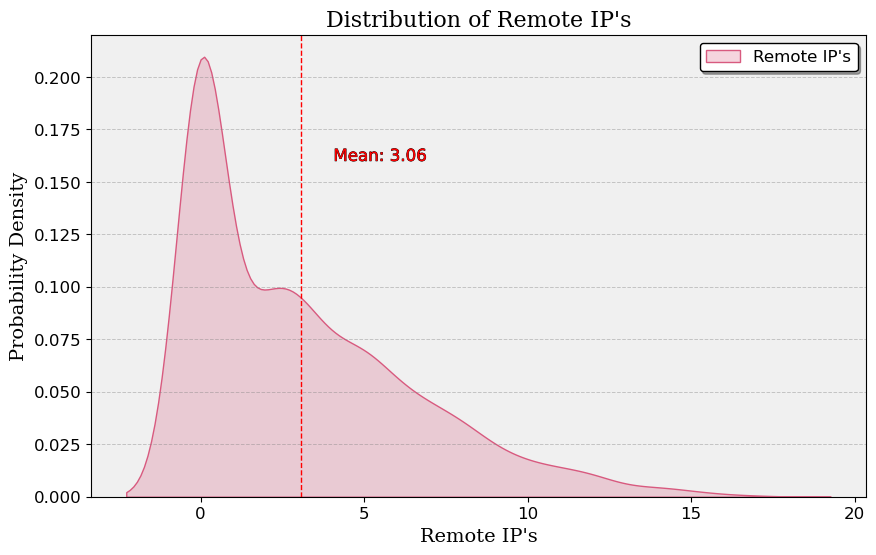

In [97]:
plot_kde(column="remote_ips", 
        title="Distribution of Remote IP's", 
        x_name="Remote IP's", 
        label="Remote IP's", 
        x_val=-1, 
        y_val=0.16, 
        color='#D85A7FFF', 
        legend_loc="upper right")

### Based off of all the analysis I have conducted so far, visually speaking, my data is not normally and in fact, it is positively skewed. However, just for good measure, let's perform a Shapiro-Wilkes test to test for normality on specific columns.


In [98]:
#Performing normality test on app bytes column.

stat, p_val = stats.shapiro(df_copy['app_bytes'])
print(f"The P-Value calculated from the test is: {p_val}.")

# Interpret the results
alpha = 0.05
if p_val > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

The P-Value calculated from the test is: 0.0.
Sample does not look Gaussian (reject H0)


In [99]:
#Performing normality test on remote_ips column.

stat, p_val = stats.shapiro(df_copy['remote_ips'])
print(f"The P-Value calculated from the test is: {p_val}.")

# Interpret the results
alpha = 0.05
if p_val > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

The P-Value calculated from the test is: 1.739388203384155e-38.
Sample does not look Gaussian (reject H0)


In [100]:
#Performing normality test on type column.

stat, p_val = stats.shapiro(df_copy['type'])
print(f"The P-Value calculated from the test is: {p_val}.")

# Interpret the results
alpha = 0.05
if p_val > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

The P-Value calculated from the test is: 0.0.
Sample does not look Gaussian (reject H0)


In [101]:
#Performing normality test on dns query times column.

stat, p_val = stats.shapiro(df_copy['dns_query_times'])
print(f"The P-Value calculated from the test is: {p_val}.")

# Interpret the results
alpha = 0.05
if p_val > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

The P-Value calculated from the test is: 8.407790785948902e-45.
Sample does not look Gaussian (reject H0)


### After visually inspecting the data and performing Shapiro-Wilk tests on specific columns, it is safe to say we are dealing with non-normal data. As such, the following statistical tests that I will be performing will be for non-normal data. (IE: Mann-Whitney U Test, Kruskal-Wallis H Test, Etc. )

## **1. Is there a significant difference between benign websites and malicious websites total number of IP app packets generated during communication between the honeypot and server? (Mann-Whitney U Test)**

$H_0$: _There is no difference between the total number of IP app packets generated during communication between the honeypot and server._

$H_1$: _There is a difference  between the total number of IP app packets generated during communication between the honeypot and server._

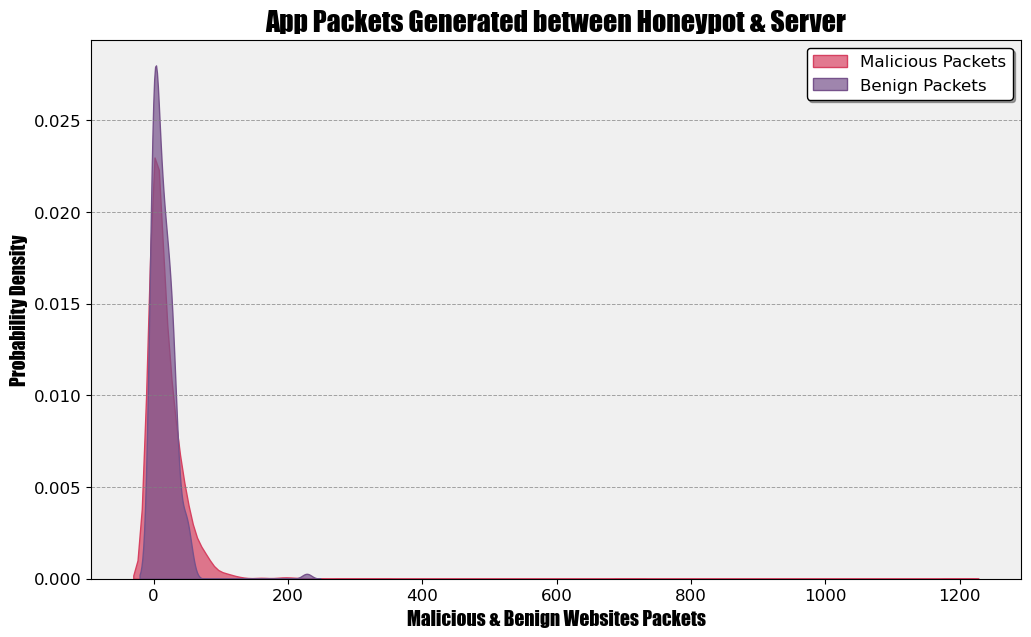

In [102]:
#Declaring variables to plot data.
benign_df = df_copy[BENIGN_WEBSITES]
benign_app_packets = benign_df['app_packets']
malicious_app_packets = malicious_df['app_packets']

#Call function to plot data.
multi_sample_test(dataset1=benign_app_packets, 
                dataset2=malicious_app_packets,
                 x1=benign_app_packets, 
                 x2=malicious_app_packets, 
                 label1="Malicious Packets", 
                 label2="Benign Packets", 
                 title="App Packets Generated between Honeypot & Server", 
                 xname="Malicious & Benign Websites Packets", 
                 yname="Probability Density",
                      dataset3=None, x3=None, label3=None, 
                      dataset4=None, x4=None, label4=None,
                      kde_color1='#D64161FF', kde_color2='#76528BFF', kde_color3='#5d8aa8', kde_color4='#e74c3c')

In [103]:
#Call function to test outcome.
stat, p_val = mannwhitneyu(benign_app_packets, malicious_app_packets)
print(f"The P-Value calculated from the test is: {p_val}.")

alpha = 0.05

test_outcome(p_val, alpha=alpha)

The P-Value calculated from the test is: 0.6899548701963913.


'Fail to reject the null hypothesis.'

### **<u>Interpretation</u>**

Based on our test outcome, we have found that there is no difference between the means of both groups of malicious and benign websites app packets generated.


## **2. Is there a significant difference between benign websites and malicious websites DNS querying times?**

$H_0$: _There is no difference between the DNS querying times for benign websites and malicious websites._

$H_1$: _There is a difference between the DNS querying times for benign websites and malicious websites._

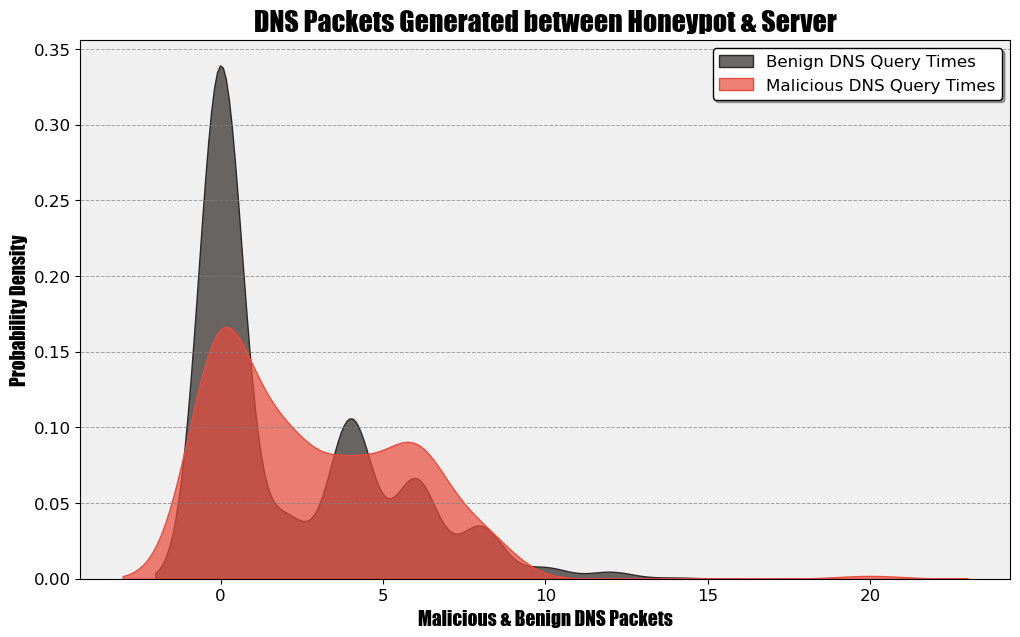

In [105]:
#Declared variables to plot data
benign_query_times = benign_df['dns_query_times']
malicious_query_times = malicious_df['dns_query_times']

#Call function to plot data.
multi_sample_test(dataset1=benign_query_times, 
                dataset2=malicious_query_times,
                 x1=benign_query_times,  
                 x2=malicious_query_times,
                 label1="Benign DNS Query Times",  
                 label2="Malicious DNS Query Times",
                 title="DNS Packets Generated between Honeypot & Server",
                 xname="Malicious & Benign DNS Packets", 
                 yname="Probability Density", 
                      dataset3=None, x3=None, label3=None, 
                      dataset4=None, x4=None, label4=None,
                      kde_color1='#2D2926FF', kde_color2='#E94B3CFF', kde_color3='#5d8aa8', kde_color4='#e74c3c')

In [106]:
stat, p_val = mannwhitneyu(benign_query_times, malicious_query_times)
print(f"The P-Value calculated from the test is: {p_val}.")

alpha = 0.05

test_outcome(p_val, alpha=alpha)

The P-Value calculated from the test is: 8.972551409301633e-05.


'Reject the null hypothesis.'

### **<u>Interpretation</u>**

Based on our test outcome, we have found that there is a statistically significant difference between the means of both groups of malicious and benign websites DNS packets generated, and therefore warrants additional research.


## **3. For malicious websites, is there a significant difference for apache, nginx and other servers tcp packets exchanged? (Kruskal-Wallis H Test)**

- $H_0$ : $\mu_{apache} = \mu_{nginx} = \mu_{other}$

- $H_a$ : $H_0$ is not true

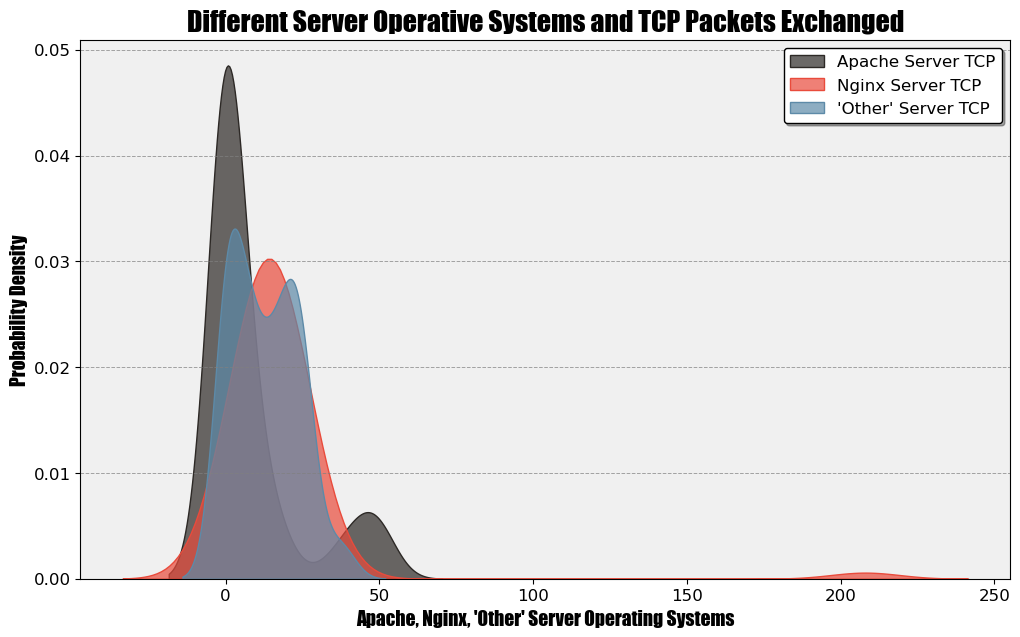

In [107]:
#Sort Data for plotting
malicious_apache_server = malicious_df[malicious_df["standardized_server"] == "apache"]['tcp_conversation_exchange']
malicious_nginx_server = malicious_df[malicious_df["standardized_server"] == "nginx"]['tcp_conversation_exchange']
malicious_other_server = malicious_df[malicious_df["standardized_server"] == "other"]['tcp_conversation_exchange']

#Call function to plot data
multi_sample_test(dataset1=malicious_apache_server, 
                dataset2=malicious_nginx_server,
                 x1=malicious_apache_server,
                 x2=malicious_nginx_server,
                 label1="Apache Server TCP",  
                 label2="Nginx Server TCP",
                 title="Different Server Operative Systems and TCP Packets Exchanged",
                 xname="Apache, Nginx, 'Other' Server Operating Systems", 
                 yname="Probability Density", 
                      dataset3=malicious_other_server, x3=malicious_other_server, label3="'Other' Server TCP", 
                      dataset4=None, x4=None, label4=None,
                      kde_color1='#2D2926FF', kde_color2='#E94B3CFF', kde_color3='#5d8aa8', kde_color4='#e74c3c')

In [108]:
stat, p_value = kruskal(malicious_apache_server, malicious_nginx_server, malicious_other_server)
print(f"The P-Value calculated from the test is: {p_val}.")

test_outcome(p_value, alpha=alpha)

The P-Value calculated from the test is: 8.972551409301633e-05.


'Reject the null hypothesis.'

### **<u>Interpretation</u>**

Based on our test outcome, we have found that the null hypothesis is not true and there is a statistically significant difference between the means of all groups, and therefore warrants additional research.


### **Section 4: Analysis & Conclusion**

The dataset was initially quite messy and required extensive data cleaning before it could be used for visualization. One of the significant tasks was standardizing the server column, which originally contained multiple versions for each specific operating system type. I cleaned and grouped these into a standardized format. Other columns also needed considerable attention. For instance, the whois_country column had inconsistent representations for countries, such as Great Britain being listed as "England," "Britain," and "Great Britain." Additionally, there were variations in text formats between uppercase and lowercase, necessitating further cleaning. After thorough data cleaning, the dataset was well-prepared for both descriptive and inferential analysis.

The descriptive analysis yielded interesting insights. The dataset revealed that there are nearly six times more benign websites than malicious ones. Spain hosts the most malicious websites, followed by the United States. In terms of operating systems, Apache and Nginx are the most popular among malicious websites. Nginx servers, in particular, are favored for their ability to handle the 'c10k' problem, which Apache's thread-based structure struggles with. This suggests that some malicious websites are designed to handle high traffic, possibly to maximize their impact. Additionally, UTF-8 was the main character encoding scheme used by malicious websites, followed by ISO-8859-1 (Latin-1). UTF-8 is a multibyte encoding that can represent any Unicode character, whereas ISO-8859-1 is a single-byte encoding. The use of UTF-8 indicates that malicious servers may require more versatile encoding capabilities.

For the inferential analysis, I formulated and tested three key questions. Initially, I generated Kernel Density Estimation (KDE) plots, which visually indicated that the data distributions were not normal and were mostly positively skewed. To confirm this, I conducted multiple Shapiro-Wilk tests, and in every case, the null hypothesis was rejected, confirming that the samples are not Gaussian. The first question I asked was whether there is a significant difference between the total number of IP app packets generated during communication between the honeypot and the server for benign and malicious websites. To test this, I conducted a Mann-Whitney U test, with the null hypothesis stating that there is no difference between the groups, and the alternative hypothesis stating that there is a difference. The result of the test led us to fail to reject the null hypothesis, indicating no significant difference between the means of both groups.

The second question I addressed was whether there is a significant difference between the DNS querying times for benign and malicious websites. Again, I used a Mann-Whitney U test, with the null hypothesis being that there is no difference in DNS querying times between the two groups, and the alternative hypothesis being that there is a difference. The test results led us to reject the null hypothesis, finding a statistically significant difference in DNS querying times between the two groups, which warrants further research. 

The final question I posed was whether there is a significant difference in TCP packets exchanged among Apache, Nginx, and other servers for malicious websites. For this, I conducted a Kruskal-Wallis H test. The null hypothesis stated that the mean TCP packets exchanged among these server types are equal, while the alternative hypothesis suggested otherwise. The results of the test led us to reject the null hypothesis, indicating a statistically significant difference in TCP packets exchanged among the three server types, which also warrants additional research.

Overall, this exploratory data analysis was both challenging and enlightening. In the next section, I will explore machine learning techniques to see if we can develop a model that can predict whether a website is malicious or benign.

**Resources / References**

https://usa.kaspersky.com/resource-center/threats/what-is-a-honeypot

https://en.wikipedia.org/wiki/Honeypot_(computing)

https://www.cloudflare.com/learning/network-layer/what-is-a-packet/

https://www.cloudflare.com/learning/ddos/glossary/tcp-ip/

https://www.ibm.com/topics/dns-protocol

https://www.nullhardware.com/blog/dns-basics/

https://www.hostinger.com/tutorials/what-is-apache

https://www.whois.com/whois/?srsltid=AfmBOoqzre7xOgzB3qPgqMSzAviQtvGHnpVXcqOHErNV3UPO5pthR73m

https://stackoverflow.com/questions/7048745/what-is-the-difference-between-utf-8-and-iso-8859-1

